<a href="https://colab.research.google.com/github/changhyeonlee-0703/dacon/blob/master/%ED%8E%AD%EA%B7%84_%EB%AA%B8%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. train.csv : 학습 데이터
 - id : 샘플 아이디
 - Species: 펭귄의 종을 나타내는 문자열
 - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
 - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
 - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
 - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
 - Flipper Length (mm) : 펭귄의 팔(날개) 길이
 - Sex : 펭귄의 성별
 - Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
 - Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
 - Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


## 2. test.csv : 테스트 데이터
 - id : 샘플 아이디
 - Species: 펭귄의 종을 나타내는 문자열
 - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
 - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
 - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
 - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
 - Flipper Length (mm) : 펭귄의 팔(날개) 길이
 - Sex : 펭귄의 성별
 - Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
 - Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율



## 3. sample_submissoin.csv : 제출 양식
 - id : 샘플 아이디
 - Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)




## 데이터 상세 설명
 - 성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다.
 - 남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율. 
 - 데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.
 - 출처: https://allisonhorst.github.io/palmerpenguins/


In [1]:
from google.colab import files
file_uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [2]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd

In [131]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


---
## EDA

In [5]:
print(train.shape)
print(test.shape)

(114, 11)
(228, 10)


species, island, clutch completion, sex 컬럼이 명목변수로 설정되어 있음

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


describe로 데이터의 특징을 살펴본 결과 count에서 몇몇 값들이 비어있는 것을 확인

In [ ]:
train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [ ]:
test.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,228.00000,228.000000,228.000000,228.000000,219.000000,220.000000
mean,113.50000,43.576316,17.219298,199.846491,8.731226,-25.667745
std,65.96211,5.506157,1.992027,13.663938,0.544827,0.759964
min,0.00000,32.100000,13.100000,172.000000,7.685280,-26.864850
25%,56.75000,38.900000,15.700000,189.750000,8.325385,-26.236812
50%,113.50000,43.250000,17.500000,196.000000,8.675380,-25.806100
75%,170.25000,48.100000,18.700000,212.000000,9.109330,-25.115125
max,227.00000,59.600000,21.500000,230.000000,10.023720,-23.787670


결측값은 sex, delta 15N, 13C 에서 확인된다.

In [ ]:
for col_name in train.columns:
  nul_cnt=train[col_name].isnull().sum()
  if nul_cnt != 0 :
    print(col_name, ' : ',nul_cnt)

Sex  :  3
Delta 15 N (o/oo)  :  3
Delta 13 C (o/oo)  :  3


In [ ]:
test.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [ ]:
train['Island'].value_counts()

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [ ]:
test['Island'].value_counts()

Biscoe       110
Dream         80
Torgersen     38
Name: Island, dtype: int64

In [ ]:
train['Species'].value_counts()

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

In [ ]:
test['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          110
Gentoo penguin (Pygoscelis papua)             75
Chinstrap penguin (Pygoscelis antarctica)     43
Name: Species, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

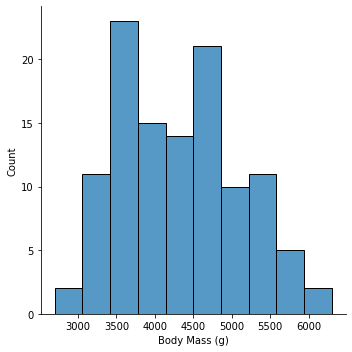

In [ ]:
sns.displot(train['Body Mass (g)'],bins=10)

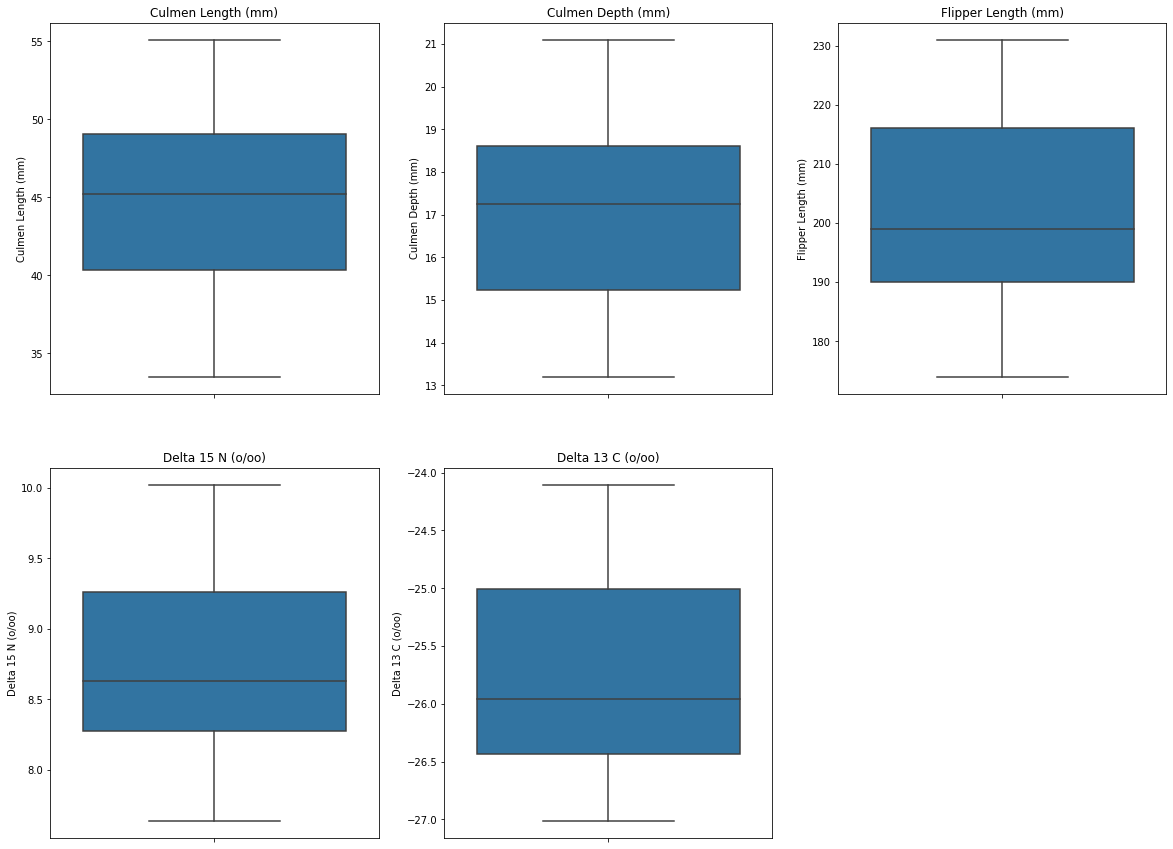

In [ ]:
discrete_names = ['Species', 'Island', 'Clutch Completion', 'Sex']
continuous_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

plt.figure(figsize=(20,15))
for i in range(len(continuous_names)):
  plt.subplot(2,3,i+1)
  plt.title(continuous_names[i])
  sns.boxplot(y=train[continuous_names[i]])

plt.show()


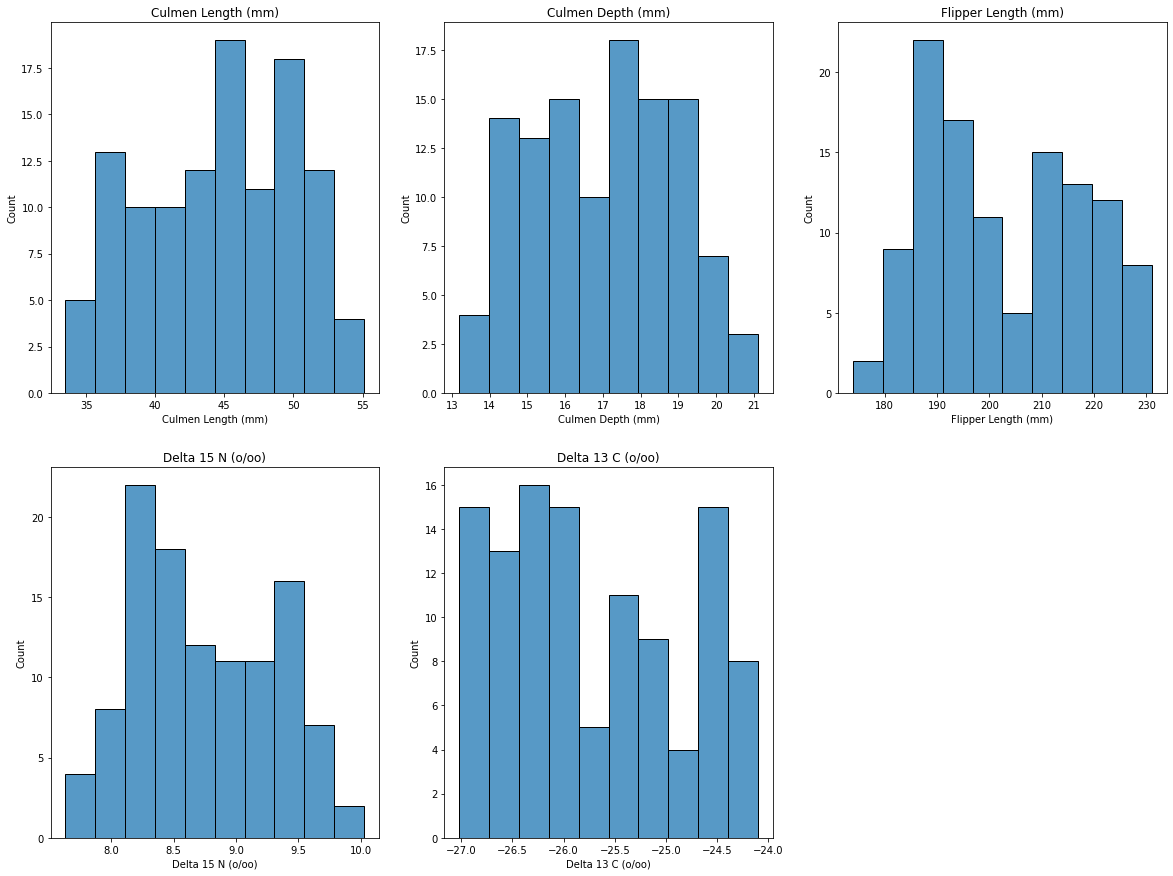

In [ ]:
plt.figure(figsize=(20,15))
for i in range(len(continuous_names)):
  plt.subplot(2,3,i+1)
  plt.title(continuous_names[i])
  sns.histplot(train[continuous_names[i]],bins=10)

plt.show()

결측치를 채우기 전에 명목형 변수들을 숫자형으로 처리한다.
먼저 값을 채우기 위한 먼저 Sex, Clutch Completion은 LabelEncoder로 나머지 명목변수들은 OneHotEncoder로 바꿔준다.

In [132]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot=OneHotEncoder()
onehot_species = pd.DataFrame(onehot.fit_transform(train[['Species']]).toarray(), columns = onehot.get_feature_names())
train = pd.concat([train,onehot_species], axis = 1).drop(columns = ['Species'])
onehot_species = pd.DataFrame(onehot.transform(test[['Species']]).toarray(), columns = onehot.get_feature_names())
test = pd.concat([test,onehot_species], axis = 1).drop(columns = ['Species'])

onehot=OneHotEncoder()
onehot_island = pd.DataFrame(onehot.fit_transform(train[['Island']]).toarray(), columns = onehot.get_feature_names())
train = pd.concat([train,onehot_island], axis = 1).drop(columns = ['Island'])
onehot_island = pd.DataFrame(onehot.transform(test[['Island']]).toarray(), columns = onehot.get_feature_names())
test = pd.concat([test,onehot_island], axis = 1).drop(columns = ['Island'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [133]:
import numpy as np
train['Sex']=np.where(train['Sex'].values=='MALE',1,np.where(train['Sex'].values=='FEMALE',0,np.nan))
test['Sex']=np.where(test['Sex'].values=='MALE',1,np.where(test['Sex'].values=='FEMALE',0,np.nan))

In [134]:
#label=LabelEncoder()
#label_sex = label.fit_transform(train['Sex'])
#train['Sex']=label_sex

label=LabelEncoder()
label_clutch_completion=label.fit_transform(train['Clutch Completion'])
train['Clutch Completion']=label_clutch_completion
label_clutch_completion=label.transform(test['Clutch Completion'])
test['Clutch Completion']=label_clutch_completion


train

,id,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),x0_Adelie Penguin (Pygoscelis adeliae),x0_Chinstrap penguin (Pygoscelis antarctica),x0_Gentoo penguin (Pygoscelis papua),x0_Biscoe,x0_Dream,x0_Torgersen
0,0,1,50.0,15.3,220,1.0,8.30515,-25.19017,5550,0.0,0.0,1.0,1.0,0.0,0.0
1,1,0,49.5,19.0,200,1.0,9.63074,-24.34684,3800,0.0,1.0,0.0,0.0,1.0,0.0
2,2,1,45.1,14.4,210,0.0,8.51951,-27.01854,4400,0.0,0.0,1.0,1.0,0.0,0.0
3,3,1,44.5,14.7,214,0.0,8.20106,-26.16524,4850,0.0,0.0,1.0,1.0,0.0,0.0
4,4,0,49.6,16.0,225,1.0,8.38324,-26.84272,5700,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,1,36.6,17.8,185,0.0,NaN,NaN,3700,1.0,0.0,0.0,0.0,0.0,1.0
110,110,1,39.2,18.6,190,1.0,9.11006,-25.79549,4250,1.0,0.0,0.0,0.0,1.0,0.0
111,111,1,43.2,18.5,192,1.0,8.97025,-26.03679,4100,1.0,0.0,0.0,0.0,1.0,0.0
112,112,0,46.9,16.6,192,0.0,9.80589,-24.73735,2700,0.0,1.0,0.0,0.0,1.0,0.0


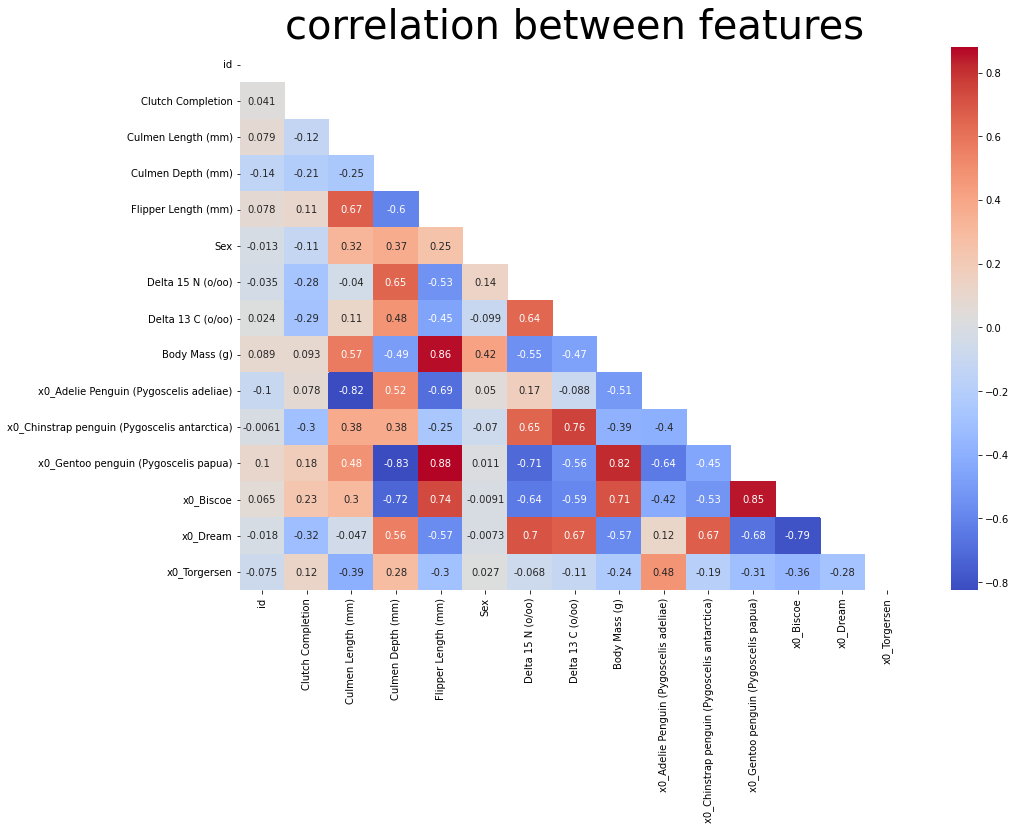

In [135]:
import numpy as np
plt.figure(figsize=(15,10))

heat_table = train.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')

plt.title('correlation between features', fontsize=40)
plt.show()

결측치들을 ML으로 채워줘보자.

In [136]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR


models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class = 'ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGBC',XGBClassifier(verbose=False)))
models.append(('LGBMC',LGBMClassifier()))
results =[]
names = []
X=train.drop(columns=['id','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)'],axis=1).iloc[train['Sex'].dropna().index]
y=train['Sex'].iloc[train['Sex'].dropna().index]
for name, model in models:
  kf = KFold(n_splits=5,random_state=0,shuffle = True)
  scores=[]
  for train_idx, valid_idx in kf.split(X,y):
    X_tr=X.iloc[train_idx]
    y_tr=y.iloc[train_idx]

    X_val=X.iloc[valid_idx]
    y_val=y.iloc[valid_idx]

    model.fit(X_tr,y_tr)
    score=accuracy_score(y_val,model.predict(X_val))
    scores.append(score)
  results.append(scores)
  names.append(name)
  print('{} : {}'.format(name,np.mean(scores)))

LR : 0.7134387351778656
KNN : 0.766403162055336
CART : 0.7920948616600791
SVM : 0.774703557312253
RFC : 0.8197628458498023
XGBC : 0.8015810276679842
LGBMC : 0.8470355731225296


Voting Classifier로 sex결측치를 넣어본다.(이렇게까지 해야하나...하는 생각이...다양한 삽질을 해본다. 배우는 과정이니깐..)

In [137]:
from sklearn.ensemble import VotingClassifier

models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class = 'ovr')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))
models.append(('XGBC',XGBClassifier(verbose=False)))
models.append(('LGBMC',LGBMClassifier()))

VC=VotingClassifier(estimators=models,voting='hard')
VC.fit(X,y)


train['Sex'].iloc[np.where(train['Sex'].isnull()==True)] = VC.predict(train[train['Sex'].isnull()].drop(columns=['id','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)']))
test['Sex'].iloc[np.where(test['Sex'].isnull()==True)] = VC.predict(test[test['Sex'].isnull()].drop(columns=['id','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [138]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

models = []
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor(verbose=False, verbosity=0)))
models.append(('LGBMR',LGBMRegressor()))

results =[]
names = []
X=train.drop(columns=['id','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)'],axis=1).iloc[train['Delta 15 N (o/oo)'].dropna().index]
y=train['Delta 15 N (o/oo)'].iloc[train['Delta 15 N (o/oo)'].dropna().index]
for name, model in models:
  kf = KFold(n_splits=5,random_state=1,shuffle = True)
  scores=[]
  for train_idx, valid_idx in kf.split(X,y):
    X_tr=X.iloc[train_idx]
    y_tr=y.iloc[train_idx]

    X_val=X.iloc[valid_idx]
    y_val=y.iloc[valid_idx]

    model.fit(X_tr,y_tr)
    score=sqrt(mean_squared_error(y_val,model.predict(X_val)))
    scores.append(score)
  results.append(scores)
  names.append(name)
  print('{} : {}'.format(name,np.mean(scores)))

LR : 0.3737481183928756
KNN : 0.42007831489608094
CART : 0.5574366936561048
SVM : 0.4883806970619514
RFR : 0.41436616151766553
XGBR : 0.42396589777109045
LGBMR : 0.39490519932831863


In [139]:
train_results=[]
test_results=[]
for name, model in models:
  train_result=model.predict(train[train['Delta 15 N (o/oo)'].isnull()].drop(columns=['id','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Body Mass (g)']))
  test_result = model.predict(test[test['Delta 15 N (o/oo)'].isnull()].drop(columns=['id','Delta 15 N (o/oo)','Delta 13 C (o/oo)']))

  if len(train_results)==0:
    train_results=train_result
    test_results=test_result
  else :
    train_results= [x + y for x, y in zip(train_results,train_result)]
    test_results= [x + y for x, y in zip(test_results,test_result)]


train['Delta 15 N (o/oo)'].iloc[np.where(train['Delta 15 N (o/oo)'].isnull()==True)] = list(map(lambda x: x / len(models), train_results))
test['Delta 15 N (o/oo)'].iloc[np.where(test['Delta 15 N (o/oo)'].isnull()==True)] = list(map(lambda x: x / len(models), test_results))


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [140]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

models = []
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor(verbose=False,  verbosity=0)))
models.append(('LGBMR',LGBMRegressor()))

results =[]
names = []
X=train.drop(columns=['id','Delta 13 C (o/oo)','Body Mass (g)'],axis=1).iloc[train['Delta 13 C (o/oo)'].dropna().index]
y=train['Delta 13 C (o/oo)'].iloc[train['Delta 13 C (o/oo)'].dropna().index]
for name, model in models:
  kf = KFold(n_splits=5,random_state=1,shuffle = True)
  scores=[]
  for train_idx, valid_idx in kf.split(X,y):
    X_tr=X.iloc[train_idx]
    y_tr=y.iloc[train_idx]

    X_val=X.iloc[valid_idx]
    y_val=y.iloc[valid_idx]

    model.fit(X_tr,y_tr)
    score=sqrt(mean_squared_error(y_val,model.predict(X_val)))
    scores.append(score)
  results.append(scores)
  names.append(name)
  print('{} : {}'.format(name,np.mean(scores)))

LR : 0.526069134172525
KNN : 0.6236309814051801
CART : 0.6908448268271802
SVM : 0.7961858793268946
RFR : 0.5072196565994369
XGBR : 0.5092648193214051
LGBMR : 0.5239878587536465


In [141]:
train_results=[]
test_results=[]
for name, model in models:
  train_result=model.predict(train[train['Delta 13 C (o/oo)'].isnull()].drop(columns=['id','Delta 13 C (o/oo)','Body Mass (g)']))
  test_result = model.predict(test[test['Delta 13 C (o/oo)'].isnull()].drop(columns=['id','Delta 13 C (o/oo)']))

  if len(train_results)==0:
    train_results=train_result
    test_results=test_result
  else :
    train_results= [x + y for x, y in zip(train_results,train_result)]
    test_results= [x + y for x, y in zip(test_results,test_result)]

train['Delta 13 C (o/oo)'].iloc[np.where(train['Delta 13 C (o/oo)'].isnull()==True)] = list(map(lambda x: x / len(models), train_results))
test['Delta 13 C (o/oo)'].iloc[np.where(test['Delta 13 C (o/oo)'].isnull()==True)] = list(map(lambda x: x / len(models), test_results))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [19]:
train.isnull().sum()

id                                              0
Clutch Completion                               0
Culmen Length (mm)                              0
Culmen Depth (mm)                               0
Flipper Length (mm)                             0
Sex                                             0
Delta 15 N (o/oo)                               0
Delta 13 C (o/oo)                               0
Body Mass (g)                                   0
x0_Adelie Penguin (Pygoscelis adeliae)          0
x0_Chinstrap penguin (Pygoscelis antarctica)    0
x0_Gentoo penguin (Pygoscelis papua)            0
x0_Biscoe                                       0
x0_Dream                                        0
x0_Torgersen                                    0
dtype: int64

In [20]:
test.isnull().sum()

id                                              0
Clutch Completion                               0
Culmen Length (mm)                              0
Culmen Depth (mm)                               0
Flipper Length (mm)                             0
Sex                                             0
Delta 15 N (o/oo)                               0
Delta 13 C (o/oo)                               0
x0_Adelie Penguin (Pygoscelis adeliae)          0
x0_Chinstrap penguin (Pygoscelis antarctica)    0
x0_Gentoo penguin (Pygoscelis papua)            0
x0_Biscoe                                       0
x0_Dream                                        0
x0_Torgersen                                    0
dtype: int64

In [23]:
print(train.shape)
print(test.shape)

(114, 15)
(228, 14)


In [24]:
print(train.dtypes)
print(test.dtypes)

id                                                int64
Clutch Completion                                 int64
Culmen Length (mm)                              float64
Culmen Depth (mm)                               float64
Flipper Length (mm)                               int64
Sex                                             float64
Delta 15 N (o/oo)                               float64
Delta 13 C (o/oo)                               float64
Body Mass (g)                                     int64
x0_Adelie Penguin (Pygoscelis adeliae)          float64
x0_Chinstrap penguin (Pygoscelis antarctica)    float64
x0_Gentoo penguin (Pygoscelis papua)            float64
x0_Biscoe                                       float64
x0_Dream                                        float64
x0_Torgersen                                    float64
dtype: object
id                                                int64
Clutch Completion                                 int64
Culmen Length (mm)                

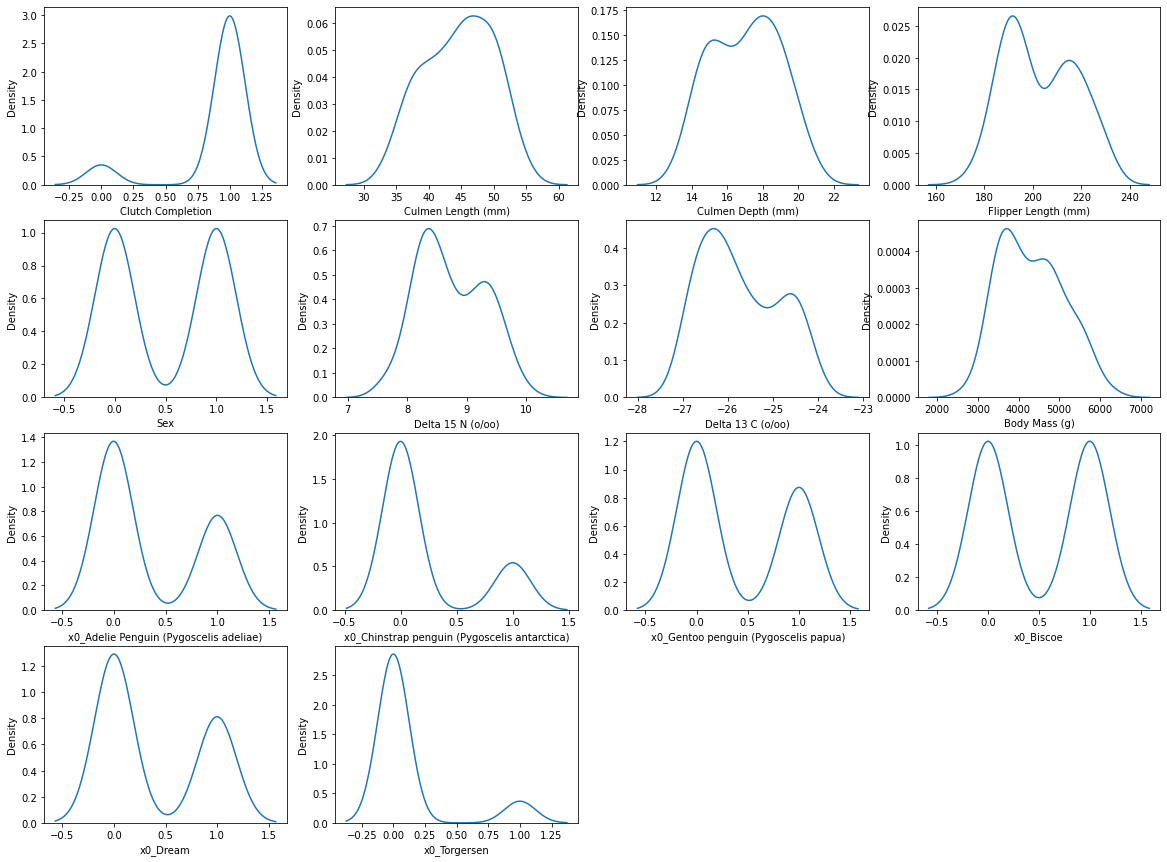

In [46]:
plt.figure(figsize=(20,15))
for i in range(1, len(train.columns)):
  plt.subplot(4,4,i)
  sns.kdeplot(train[train.columns[i]])

plt.show()

기본, 정규화, 표준화를 한 모델을 비교해보자.

###  기본 train으로 모델링

In [142]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

models = []
models.append(('LR',LinearRegression()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor(verbose=False,  verbosity=0)))
models.append(('LGBMR',LGBMRegressor()))


base_results =[]
names = []
X=train.drop(columns=['id','Body Mass (g)'])
y=train['Body Mass (g)']
base_test=test.drop(columns=['id'])

for name, model in models:
  kf = KFold(n_splits=5,random_state=1,shuffle = True)
  scores=[]
  for train_idx, valid_idx in kf.split(X,y):
    X_tr=X.iloc[train_idx]
    y_tr=y.iloc[train_idx]

    X_val=X.iloc[valid_idx]
    y_val=y.iloc[valid_idx]

    model.fit(X_tr,y_tr)
    score=sqrt(mean_squared_error(y_val,model.predict(X_val)))
    scores.append(score)
  base_results.append(scores)
  names.append(name)
  print('{} : {}'.format(name,np.mean(scores)))
  

LR : 321.8203259090963
KNN : 378.98619639222017
CART : 443.5614033152493
SVM : 785.4194378187848
RFR : 341.1360466539709
XGBR : 358.817481687423
LGBMR : 336.9438218901171


### 표준화한 train으로 모델링

In [151]:
from sklearn.preprocessing import StandardScaler

standard_models = []
standard_models.append(('LR',LinearRegression()))
standard_models.append(('KNN',KNeighborsRegressor()))
standard_models.append(('CART',DecisionTreeRegressor()))
standard_models.append(('SVM',SVR()))
standard_models.append(('RFR',RandomForestRegressor()))
standard_models.append(('XGBR',XGBRegressor(verbose=False,  verbosity=0)))
standard_models.append(('LGBMR',LGBMRegressor()))

standard=StandardScaler()
standard.fit(X)
standard_X=pd.DataFrame(standard.transform(X), columns=X.columns)
standard_test=test.drop(columns=['id'])
standard_test=pd.DataFrame(standard.transform(standard_test), columns=X.columns)

names=[]
standard_results =[]
for name, model in standard_models:
  kf = KFold(n_splits=5,random_state=1,shuffle = True)
  standard_scores=[]
  for train_idx, valid_idx in kf.split(standard_X,y):
    X_tr=standard_X.iloc[train_idx]
    y_tr=y.iloc[train_idx]

    X_val=standard_X.iloc[valid_idx]
    y_val=y.iloc[valid_idx]

    model.fit(X_tr,y_tr)
    score=sqrt(mean_squared_error(y_val,model.predict(X_val)))
    standard_scores.append(score)
  standard_results.append(standard_scores)
  names.append(name)
  print('{} : {}'.format(name,np.mean(standard_scores)))

LR : 321.82032590909654
KNN : 346.40299854220905
CART : 448.70937412948143
SVM : 773.4420931414999
RFR : 340.20623373904493
XGBR : 359.1888222132628
LGBMR : 335.94591378272855


### 정규화한 train으로 모델링

In [152]:
from sklearn.preprocessing import MinMaxScaler

normal_models = []
normal_models.append(('LR',LinearRegression()))
normal_models.append(('KNN',KNeighborsRegressor()))
normal_models.append(('CART',DecisionTreeRegressor()))
normal_models.append(('SVM',SVR()))
normal_models.append(('RFR',RandomForestRegressor()))
normal_models.append(('XGBR',XGBRegressor(verbose=False,  verbosity=0)))
normal_models.append(('LGBMR',LGBMRegressor()))


normal=MinMaxScaler()
normal.fit(X)
normal_X=pd.DataFrame(standard.transform(X), columns=X.columns)
normal_test=test.drop(columns=['id'])
normal_test=pd.DataFrame(standard.transform(normal_test), columns=X.columns)

names=[]
normal_results=[]
for name, model in normal_models:
  kf = KFold(n_splits=5,random_state=1,shuffle = True)
  normal_scores=[]
  for train_idx, valid_idx in kf.split(normal_X,y):
    X_tr=normal_X.iloc[train_idx]
    y_tr=y.iloc[train_idx]

    X_val=normal_X.iloc[valid_idx]
    y_val=y.iloc[valid_idx]

    model.fit(X_tr,y_tr)
    score=sqrt(mean_squared_error(y_val,model.predict(X_val)))
    normal_scores.append(score)
  normal_results.append(normal_scores)
  names.append(name)
  print('{} : {}'.format(name,np.mean(normal_scores)))

LR : 321.82032590909654
KNN : 346.40299854220905
CART : 427.8132752154832
SVM : 773.4420931414999
RFR : 342.7516392066676
XGBR : 359.1888222132628
LGBMR : 335.94591378272855


#### 이제 기본, 표준화, 정규화한 데이터로 모델링한 애들을 비교해보자

In [153]:
base_results=list(map(np.mean,base_results))
standard_results=list(map(np.mean,standard_results))
normal_results=list(map(np.mean,normal_results))

In [154]:
graph_df=pd.DataFrame(columns=names)
graph_df = graph_df.append(pd.Series(base_results, index=graph_df.columns), ignore_index=True)
graph_df = graph_df.append(pd.Series(standard_results, index=graph_df.columns), ignore_index=True)
graph_df = graph_df.append(pd.Series(normal_results, index=graph_df.columns), ignore_index=True)
graph_df.rename(index={0:'base',1:'standard',2:'normal'},inplace=True)
graph_df

,LR,KNN,CART,SVM,RFR,XGBR,LGBMR
base,321.820326,378.986196,443.561403,785.419438,341.136047,358.817482,336.943822
standard,321.820326,346.402999,448.709374,773.442093,340.206234,359.188822,335.945914
normal,321.820326,346.402999,427.813275,773.442093,342.751639,359.188822,335.945914


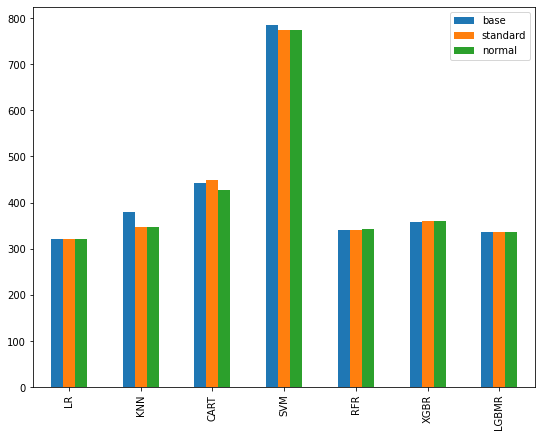

In [155]:
graph_df.T.plot(kind='bar',figsize=(9,7))
plt.show()


위의 그래프로 의사결정나무와 SVM이 성능이 낮은 것을 볼 수 있다. 이 두개 모델을 제외하고 데이터로 앙상블 모델을 만든다.

### 기본 train으로 만든 모델로 test데이터를 예측해본다.

점수 : 289.658655845

In [160]:
test_results=[]
name_cnt=0
for name, model in models:
  if name=='CART' or name=='SVM':
    continue

  name_cnt+=1
  test_result = model.predict(base_test)

  if len(test_results)==0:
    test_results=test_result
  else:
    test_results=[x+y for x,y in zip(test_results,test_result)]


test_results=list(map(lambda x:x/name_cnt, test_results))

sample=pd.read_csv('sample_submission.csv')
sample['Body Mass (g)']=test_results

sample.to_csv('base_model.csv',index=False)

### 표준화한 train으로 만든 모델로 test데이터를 예측해본다.
점수 : 289.962761874

In [161]:
test_results=[]
name_cnt=0
for name, model in standard_models:
  if name=='CART' or name=='SVM':
    continue

  name_cnt+=1
  test_result = model.predict(standard_test)

  if len(test_results)==0:
    test_results=test_result
  else:
    test_results=[x+y for x,y in zip(test_results,test_result)]


test_results=list(map(lambda x:x/name_cnt, test_results))

sample=pd.read_csv('sample_submission.csv')
sample['Body Mass (g)']=test_results

sample.to_csv('standard_model.csv',index=False)

### 정규화한 train으로 만든 모델로 test데이터를 예측해본다.
점수 : 289.9015192568


In [162]:
test_results=[]
name_cnt=0
for name, model in normal_models:
  if name=='CART' or name=='SVM':
    continue

  name_cnt+=1
  test_result = model.predict(normal_test)

  if len(test_results)==0:
    test_results=test_result
  else:
    test_results=[x+y for x,y in zip(test_results,test_result)]


test_results=list(map(lambda x:x/name_cnt, test_results))

sample=pd.read_csv('sample_submission.csv')
sample['Body Mass (g)']=test_results

sample.to_csv('normal_model.csv',index=False)

---

In [91]:
rf_params={
    'max_depth':(1,3),
    'n_estimators':(30,100),
}
xgb_params={
    'gamma':(0,10),
    'max_depth':(1,3),
    'subsample':(0.5,1),
}
lgbm_params={
    'n_estimators':(30,100),
    'max_depth':(1,3),
    'subsample':(0.5,1)
}

In [ ]:
def rf_bo(max_depth, n_estimators):
  params={
      'max_depth':int(round(max_depth)),
      'n_estimators':int(round(n_estimators)),
  }

  model=RandomForestClassifier(**params)
  
  X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.8)
  model.fit(X_train, y_train)

  score=accuracy_score(y_valid, model.predict(X_valid))
  return score

def xgb_bo(gamma,max_depth, subsample):
  params={
      'gamma':int(round(gamma)),
      'max_depth':int(round(max_depth)),
      'subsample':int(round(subsample)),
  }
  model=XGBClassifier(**params)
  X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

  model.fit(X_train,y_train)

  score=accuracy_score(y_valid,model.predict(X_valid))
  return score

def lgbm_bo(n_estimators,max_depth, subsample):
  params={
      'n_estimaotrs':int(round(n_estimators)),
      'max_depth':int(round(max_depth)),
      'subsample':int(round(subsample)),
  }
  model=LGBMClassifier(**params)
  X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)
  model.fit(X_train,y_train)

  score=accuracy_score(y_valid,model.predict(X_valid))
  return score